# Import Libraries

In [57]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Import & View CSV file to work on

In [40]:
csv_fpath = 'output_20231008201610.csv'
csv_fpath = os.path.join("results", csv_fpath)
df=pd.read_csv(csv_fpath)
df.head()

,email,feedback,date,sentiment
0,user123@example.com,This project is a game-changer! It's so easy t...,2023-10-09,0.716667
1,happyuser@email.net,I'm beyond impressed with this project. The de...,2023-10-10,0.788889
2,projectlover@gmail.com,This project exceeded my expectations. It's in...,2023-10-11,0.500000
3,satisfieduser@example.org,I'm seriously impressed by this project. It's ...,2023-10-12,0.585000
4,amazingproject@email.com,I just had to write and say thank you for this...,2023-10-13,1.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   email      20 non-null     object 
 1   feedback   20 non-null     object 
 2   date       20 non-null     object 
 3   sentiment  20 non-null     float64
dtypes: float64(1), object(3)
memory usage: 768.0+ bytes


### TextBlob returns polarity of a sentence (and subjectivity, could be added to the csv). Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.

In [52]:
df.describe()

,sentiment
count,20.000000
mean,0.284625
std,0.390342
min,-0.456250
25%,-0.085000
50%,0.366875
75%,0.586667
max,1.000000


## Visualizing sentiments using a histogram

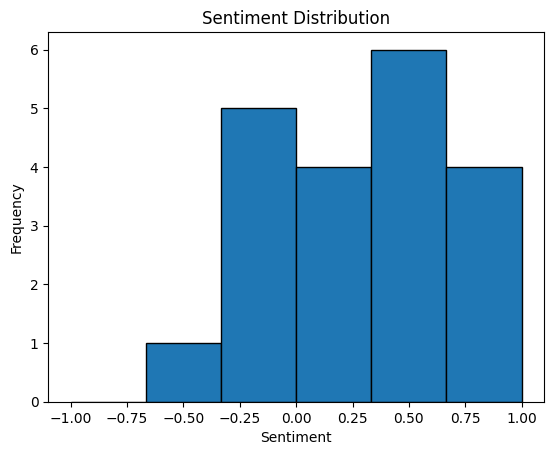

In [55]:
plt.hist(df['sentiment'], bins=6, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

## Visualization of Sentiment Distribution on Likert Scale

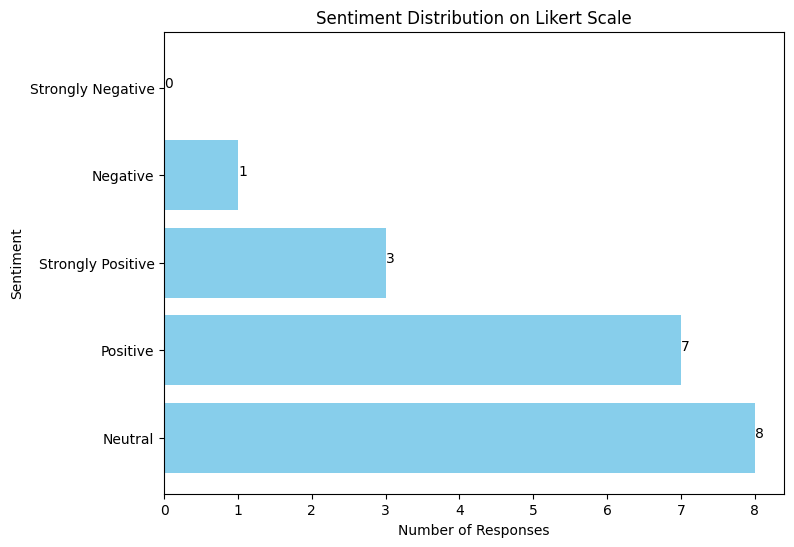

In [56]:
sentiments = df['sentiment']

# Define Likert scale categories
categories = ['Strongly Negative', 'Negative', 'Neutral', 'Positive', 'Strongly Positive']

# Map sentiment values to Likert scale categories
sentiment_labels = pd.cut(sentiments, bins=[-1, -0.6, -0.2, 0.2, 0.6, 1], labels=categories, right=False)

# Count the frequency of each category
category_counts = sentiment_labels.value_counts()

# Set up the plot
plt.figure(figsize=(8, 6))
plt.barh(category_counts.index, category_counts.values, color='skyblue')

# Add data values on top of the bars
for index, value in enumerate(category_counts.values):
    plt.text(value, index, str(value))

# Add labels and title
plt.xlabel('Number of Responses')
plt.ylabel('Sentiment')
plt.title('Sentiment Distribution on Likert Scale')

# Show the plot
plt.show()
